In [134]:
%load_ext autoreload
%autoreload 2

import os
import sys
from functools import partial

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap   
import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

sys.path.append('../')

from cofilin.forward_model.config import Constants, FMConfig
from cofilin.forward_model.fmodel import FModel
from cofilin.forward_model.cosmic_web import get_phi_web, get_cweb

from cofilin.forward_model.fourier import my_ifft
from cofilin.forward_model.bias import manage_params
from cofilin.forward_model.plot_utils import plot_cubes, compare_pow_spec, get_projection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
N, Z_I, Z_F = 256, 99, 0
R = 3.4*1
L = R*N

cte = Constants(N, L, Z_I, Z_F)

lpt_method = "2LPT"
MND = 1e-2
N_TR = L**3 * MND

det_bias_model = "HighPassPowerLaw"
stoch_bias_model = "NegBinomial"

cweb = 'PhiWeb'
soft_cweb = False
cweb_sharpness = 10
lambda_th = 0.01

fm_cfg = FMConfig(
    N,
    L,
    Z_I,
    Z_F,
    N_TR=N_TR,
    lpt_method=lpt_method,
    det_bias_model=det_bias_model,
    stoch_bias_model=stoch_bias_model,
    cweb=cweb, 
    soft_cweb=soft_cweb,
    cweb_sharpness=cweb_sharpness, 
    lambda_th=lambda_th
)
fmodel = FModel(fm_cfg)

soft_cweb = True
cweb_sharpness = 15

fm_cfg_soft = FMConfig(
    N,
    L,
    Z_I,
    Z_F,
    N_TR=N_TR,
    det_bias_model=det_bias_model,
    stoch_bias_model=stoch_bias_model,
    cweb=cweb, 
    soft_cweb=soft_cweb,
    cweb_sharpness=cweb_sharpness, 
    lambda_th=lambda_th
)
fmodel_soft = FModel(fm_cfg_soft)

In [127]:
q_data = fmodel.input_arr(jax.random.PRNGKey(1))
delta_in_hat = fmodel.delta_in(q_data)
delta_in = my_ifft(delta_in_hat, cte.INV_L3)
delta_lpt = fmodel.delta_lpt(q_data)

hard_cweb_arr = fmodel.cweb(delta_lpt) 
soft_cweb_arr = fmodel_soft.cweb(delta_lpt) 

/tmp/ipykernel_17176/3530036342.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)


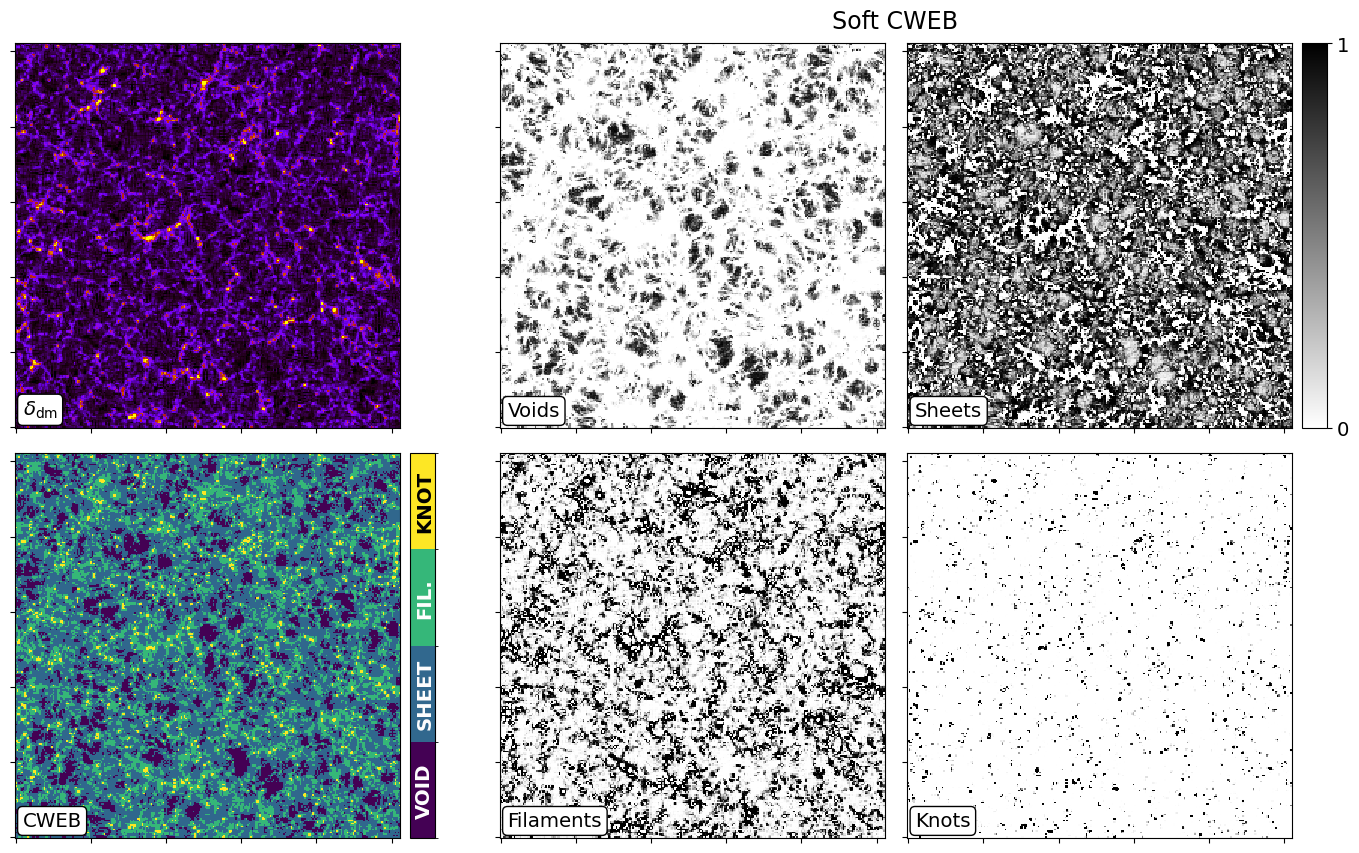

In [218]:
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red
# colors = ('#4E79A7', '#F28E2B', '#E15759', '#76B7B2')  # blue, orange, red, teal
# colors = ('#0072B2', '#E69F00', '#009E73', '#D55E00')  # blue, orange, green, red
# colors = ('#A16928', '#D9C89E', '#8C7051', '#6B4226')  # brown variants
# colors = ('#5DA5DA', '#60BD68', '#B276B2', '#B2912F')  # blue, green, purple, gold
# colors = ('#E69F00', '#56B4E9', '#009E73', '#D55E00')  # orange, sky blue, green, vermilion
# colors = ('#332288', '#88CCEE', '#117733', '#DDCC77')  # navy, light blue, forest green, sand yellow
# colors = ('#ef94ff', '#67c78c', '#00b6f2', '#0007cf')
# cmap_hcweb = ListedColormap(colors, name='fixed_colors')

# def white_to_color(color):
#     return LinearSegmentedColormap.from_list(f'white_to_{color}', ['white', color])

# cmaps_scweb = [white_to_color(c) for c in colors]

get_proj = partial(get_projection, axis=2, idx=N//2, width=1)

fs, rat = 5, 2
fig, ax1 = plt.subplots(1, 1, figsize=(fs*rat, fs))

vlim_lpt = (-1, 10)
cmap_lpt = 'gnuplot'
slice_lpt, _, _ = get_proj(delta_lpt)

im1 = ax1.imshow(
    slice_lpt.T,
    vmin=vlim_lpt[0],
    vmax=vlim_lpt[1],
    origin="lower",
    cmap=cmap_lpt,
    interpolation='nearest',
)

ax1_pos = ax1.get_position()
separation_y = 0.01 * fs
total_height = ax1_pos.y1 - ax1_pos.y0

ax2 = fig.add_axes([
    ax1_pos.x0, ax1_pos.y0 - total_height- separation_y, ax1_pos.width, ax1_pos.height]
)
ax2_pos = ax2.get_position()

separation_x = 0.02 * fs
ax3 = fig.add_axes([
    ax1_pos.x1 + separation_x, ax1_pos.y0, ax1_pos.width, ax1_pos.height]
)
ax3_pos = ax3.get_position()

ax4 = fig.add_axes([
    ax3_pos.x0, ax3_pos.y0- total_height- separation_y, ax3_pos.width, ax3_pos.height]
)
ax4_pos = ax4.get_position()

separation_x_2 = 0.0045 * fs
ax5 = fig.add_axes([
    ax3_pos.x1+separation_x_2, ax3_pos.y0, ax3_pos.width, ax3_pos.height]
)
ax5_pos = ax5.get_position()

ax6 = fig.add_axes([
    ax5_pos.x0, ax5_pos.y0 - total_height- separation_y , ax5_pos.width, ax5_pos.height]
)
ax6_pos = ax6.get_position()

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])


vlim_lpt = (-1, 10)
cmap_lpt = 'gnuplot'
slice_lpt, _, _ = get_proj(delta_lpt)

im1 = ax1.imshow(
    slice_lpt.T,
    vmin=vlim_lpt[0],
    vmax=vlim_lpt[1],
    origin="lower",
    cmap=cmap_lpt,
    interpolation='nearest',
)



vlim_hcweb = (0, 3)
# cmap_hcweb = 'viridis'
slice_hcweb, _, _ = get_proj(hard_cweb_arr)

boundaries = [0, 0.75, 1.5, 2.25, 3]
viridis = plt.cm.get_cmap('viridis', 256)
color_vals = viridis(np.linspace(0, 1, 256))
step_indices = np.linspace(0, 255, 4, dtype=int)
discrete_colors = color_vals[step_indices]
cmap_hcweb = ListedColormap(discrete_colors)
norm = BoundaryNorm(boundaries, cmap_hcweb.N)

im2 = ax2.imshow(
    slice_hcweb.T,
    # vmin=vlim_hcweb[0],
    # vmax=vlim_hcweb[1],
    origin="lower",
    cmap=cmap_hcweb,
    norm=norm,
    interpolation='nearest',
)



vlim_scweb = (0, 1)
cmaps_scweb = ['binary']*4
slice_scweb_V, _, _ = get_proj(soft_cweb_arr[..., 0])

im3 = ax3.imshow(
    slice_scweb_V.T,
    vmin=vlim_scweb[0],
    vmax=vlim_scweb[1],
    origin="lower",
    cmap=cmaps_scweb[0],
    interpolation='nearest',
)

slice_scweb_S, _, _ = get_proj(soft_cweb_arr[..., 1])
im5 = ax5.imshow(
    slice_scweb_S.T,
    vmin=vlim_scweb[0],
    vmax=vlim_scweb[1],
    origin="lower",
    cmap=cmaps_scweb[1],
    interpolation='nearest',
)

slice_scweb_F, _, _ = get_proj(soft_cweb_arr[..., 2])
im4 = ax4.imshow(
    slice_scweb_F.T,
    vmin=vlim_scweb[0],
    vmax=vlim_scweb[1],
    origin="lower",
    cmap=cmaps_scweb[2],
    interpolation='nearest',
)

slice_scweb_K, _, _ = get_proj(soft_cweb_arr[..., 3])
im6 = ax6.imshow(
    slice_scweb_K.T,
    vmin=vlim_scweb[0],
    vmax=vlim_scweb[1],
    origin="lower",
    cmap=cmaps_scweb[3],
    interpolation='nearest',
)


# Add manual cbar axis
cbar_width = 0.025
cbar_pad = 0.01
# Boundaries and labels
ticks = [(boundaries[i] + boundaries[i+1]) / 2 for i in range(len(labels))]

# Manual colorbar axis
cbar_ax = fig.add_axes([
    ax2_pos.x1 + cbar_pad,
    ax2_pos.y0,
    cbar_width,
    ax2_pos.height
])

ts = 2.85
# Draw colorbar
cbar = fig.colorbar(im2, cax=cbar_ax, boundaries=boundaries, ticks=ticks)
cbar.ax.tick_params(length=0)
cbar.ax.set_yticklabels([])

tick_positions = [(boundaries[i] + boundaries[i+1]) / 2 for i in range(4)]

lnames = ['VOID', 'SHEET', 'FIL.', 'KNOT']
cs = ['w', 'w', 'w', 'k']
pos = []
xp = 0.75/3/2

for i in range(4):
    cbar.ax.text(
        0.6,                          # x offset
        xp + 2*xp*i,                   # y position
        lnames[i],                       # label
        color=cs[i],
        weight='bold',
        va='center',
        ha='center',
        rotation=90,
        fontsize=fs*ts,
        transform=cbar.ax.transAxes
    )


ax5_pos = ax5.get_position()
# Add new axis for colorbar
cbar_ax5 = fig.add_axes([
    ax5_pos.x1 + cbar_pad,
    ax5_pos.y0,
    cbar_width,
    ax5_pos.height
])

# Create colorbar with ticks at 0 and 1
cbar5 = fig.colorbar(im5, cax=cbar_ax5, ticks=[0, 1])
cbar5.ax.set_yticklabels(['0', '1'], fontsize=fs*ts)

axs = [ax1, ax2, ax3, ax5, ax4, ax6]

titles = [r'$\delta_{\text{dm}}$', 'CWEB', 'Voids', 'Sheets', 'Filaments', 'Knots']
for i, ax in enumerate(axs):
    ax.text(
        0.02,
        0.02,
        titles[i],
        ha="left",
        va="bottom",
        transform=ax.transAxes,
        fontsize=fs * ts,
        c="k",
        bbox=dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round,pad=0.25",
            alpha=1,
        ),
    )


fig.text(1.20, 0.9, 'Soft CWEB', fontsize=fs*ts*1.2, ha='center', va='bottom')

fig.savefig('cweb.png', bbox_inches='tight')


In [222]:
get_n_tr_mean = fmodel.n_tr_mean()
get_n_tr_mean_soft = fmodel_soft.n_tr_mean()

key_params = jax.random.PRNGKey(0)
sks = jax.random.split(key_params, 4)
alpha = jax.random.normal(sks[0], (fm_cfg.n_regions,))*0.2 + 1
e_hp = jax.random.normal(sks[1], (fm_cfg.n_regions,))*0.1 + 1
rho_hp = jax.random.normal(sks[2], (fm_cfg.n_regions,))*0.5 + 2
beta = jax.random.normal(sks[3], (fm_cfg.n_regions,))*3 + 10

params = {"alpha": alpha, "e_hp": e_hp, "rho_hp": rho_hp, "beta": beta}

n_tr_mean = get_n_tr_mean(delta_lpt, params, hard_cweb_arr)
n_tr_mean_soft = get_n_tr_mean_soft(delta_lpt, params, soft_cweb_arr)


key_sample = jax.random.PRNGKey(1)
sks_sample = jax.random.split(key_sample, 2)
n_tr_data = fmodel.sample_n_tr(n_tr_mean, sks_sample[0], params=params, cweb=hard_cweb_arr)
n_tr_data_soft = fmodel_soft.sample_n_tr(n_tr_mean_soft, sks_sample[1], params=params, cweb=soft_cweb_arr)

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: xlabel='$k$ [$h$/Mpc]'>, <Axes: xlabel='$k$ [$h$/Mpc]'>,
        <Axes: xlabel='$k$ [$h$/Mpc]'>], dtype=object))

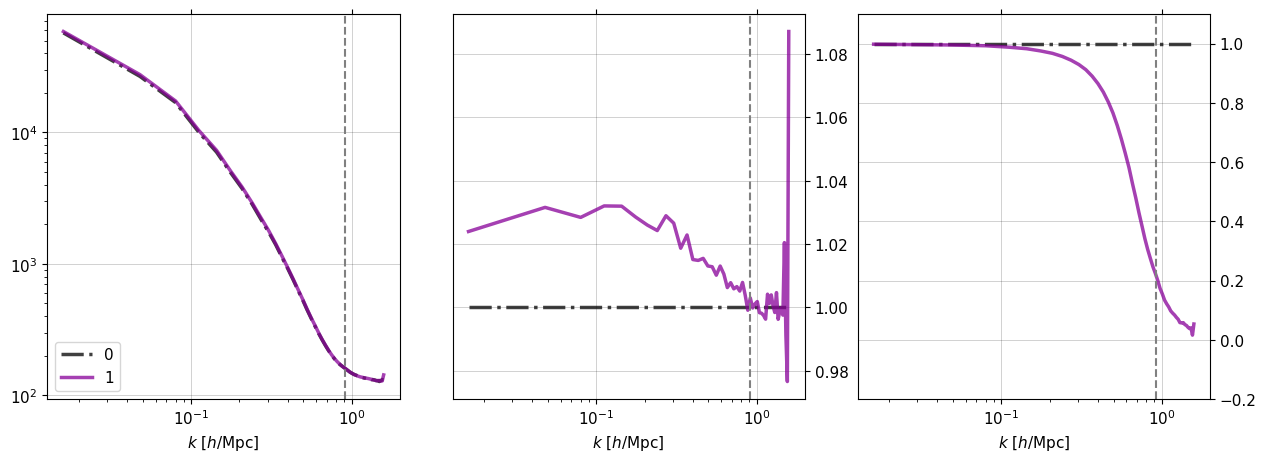

In [227]:
from cofilin.forward_model.plot_utils import plot_cubes, compare_pow_spec, get_projection

delta_n_tr_data = n_tr_data * N**3  / n_tr_data.sum() - 1
delta_n_tr_data_soft = n_tr_data_soft * N**3  / n_tr_data_soft.sum() - 1 

compare_pow_spec([delta_n_tr_data, delta_n_tr_data_soft], L=L, xlog=True)

In [225]:
#plot_cubes([n_tr_data, n_tr_data_soft], cmap='gnuplot2', vlim=(0, 10))